IMPORTATION DES LIBRAIRIES NECESSAIRES 

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

CHARGEMENT DES DONNÉES DANS GOOGLE COLAB

In [26]:
#définition d'une fonction qui permet de lire le fichier contenant les données
def load_mnist_dataset():
    mnist = loadmat("/mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)


data, labels, classes_count, data_shape = load_mnist_dataset()

print("forme des données: " + str(data.shape))
print("forme des étiquettes : " + str(labels.shape))
print("Nombre de classes: " + str(classes_count))

forme des données: (70000, 28, 28, 1)
forme des étiquettes : (70000,)
Nombre de classes: 10


VISUALISONS LES IMAGES QUE NOUS AVONS 

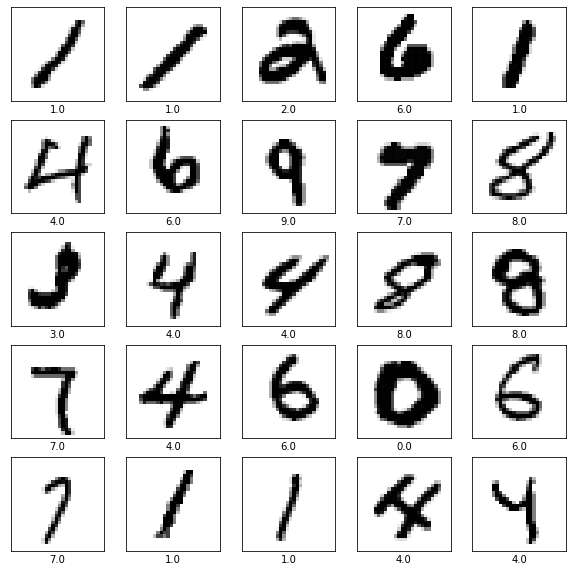

In [27]:
#je définie la fonction qui va nous permettre d'afficher les nombres je prends les coordonnées en paramètres
def plot_images_sample(X, Y):
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()


plot_images_sample(data, labels)



Avant de continuer, nous devons préparer nos données pour le modèle

tout d'abord, nous devons diviser les données en 2 parties, ensemble de trains et ensemble de tests, de sorte que nous nous assurons que le modèle ne s'entraîne pas sur l'ensemble de tests
ensuite, nous devons faire nos données d'entrée dans la plage de 0 à 1 afin qu'il devienne plus facile pour le modèle d'être formé

et enfin, nous, afin d'utiliser nos étiquettes dans le modèle, nous avons besoin de convertir l'encodage en un encodage à chaud



In [28]:
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(data, labels, test_size=0.1, shuffle=True)

X_train = x_train_orig / 255.
X_test = x_test_orig / 255.
Y_train = to_categorical(y_train_orig)
Y_test = to_categorical(y_test_orig)

Définir la structure du modèle

ce modèle comprend 2 couches Conv suivies chacune d'une couche MaxPooling, et à la fin après l'aplatissement, nous avons une couche entièrement connectée.

In [29]:
model = models.Sequential([
        layers.Conv2D(8, kernel_size=(6, 6), strides=(1, 1), padding='same', activation='relu', input_shape=data_shape),
        layers.MaxPooling2D((6, 6), padding='same'),
        layers.Conv2D(16, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='softmax'),
        layers.MaxPooling2D((4, 4), padding='same'),
        layers.Flatten(),
        layers.Dense(classes_count,activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         296       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 16)          2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                6

Tout est prêt pour compiler et entraîner notre modèle...

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1575/1575 [==============================] - 40s 25ms/step - loss: 0.6652 - accuracy: 0.8222 - val_loss: 0.2304 - val_accuracy: 0.9394
Epoch 2/50
1575/1575 [==============================] - 37s 23ms/step - loss: 0.1789 - accuracy: 0.9508 - val_loss: 0.1532 - val_accuracy: 0.9557
Epoch 3/50
1575/1575 [==============================] - 37s 23ms/step - loss: 0.1291 - accuracy: 0.9627 - val_loss: 0.1239 - val_accuracy: 0.9634
Epoch 4/50
1575/1575 [==============================] - 37s 23ms/step - loss: 0.1077 - accuracy: 0.9685 - val_loss: 0.1046 - val_accuracy: 0.9687
Epoch 5/50
1575/1575 [==============================] - 37s 23ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.0983 - val_accuracy: 0.9709
Epoch 6/50
1575/1575 [==============================] - 38s 24ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0937 - val_accuracy: 0.9727
Epoch 7/50
1575/1575 [==============================] - 37s 23ms/step - loss: 0.0766 - accuracy: 0.9772 - val_loss: 0.0844 - val_accura

Très bien, maintenant nous pouvons regarder le résultat et voir ce que nous avons fait jusqu'à présent

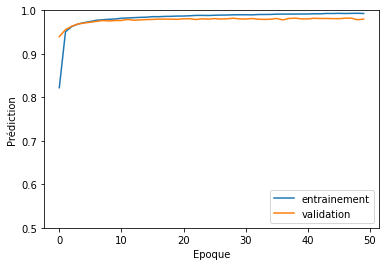

In [32]:
plt.plot(history.history['accuracy'], label='entrainement')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoque')
plt.ylabel('Prédiction')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

LES TESTS DE PREDICTION

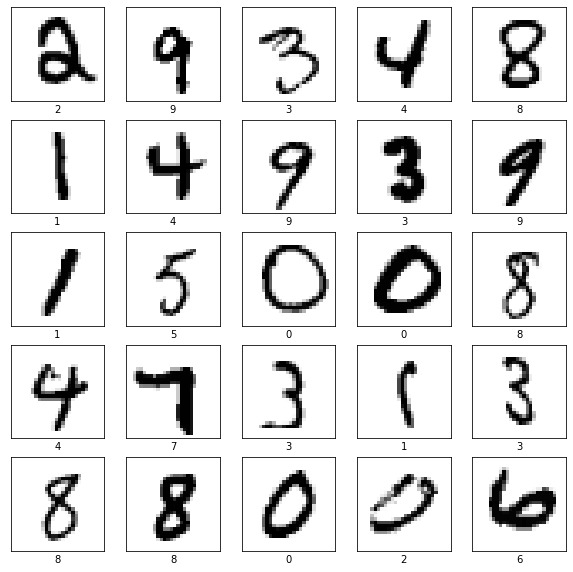

In [33]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

plot_images_sample(X_test, predictions)

et ici nous avons de mauvais échantillons de prédiction

In [34]:
def plot_cm(train, target_train):
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Matrice de confusion',
                              cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Prédire les valeurs du jeu de données de validation
    Y_pred = model.predict(train)
    # Convertir des classes de prédictions en un vecteur actif
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convertir les observations de validation en un vecteur actif
    Y_true = np.argmax(target_train,axis = 1) 
    # calculer la matrice de confusion
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # tracer la matrice de confusion
    plot_confusion_matrix(confusion_mtx, classes = range(10)) 

matrice de confusion

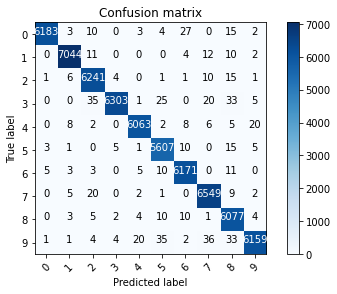

In [35]:
plot_cm(X_train, Y_train)